In [46]:
import requests
import matplotlib.pyplot as plt

api_key_file = open("DEVELOPMENT_API_KEY.txt")
key = api_key_file.read()
api_key_file.close()

linkkey = "?api_key="+key

summoner_url = "https://jp1.api.riotgames.com/lol/summoner/v4/summoners/by-name/"
summoner_name = "tsks"
summoner_url = summoner_url+summoner_name+linkkey

me = requests.get(summoner_url).json()
print(me)

{'id': 'G7V4TuRecLmmRUaZ6MDOLhHJTlDBaZ2hptPS4xVwG0slEg', 'accountId': 'xzYE62ud2ZLt7JXAsTSY595NV2C1FkyQp2YRtKfv7mdKsDU', 'puuid': '6ORTo7zOQN88_0kuo7SIV7V9lkfPOz7LJ2hg6FXTsc0tztCjjd4aicXLTmBBaALlI-_JYESdt8A6BQ', 'name': 'Tsks', 'profileIconId': 7, 'revisionDate': 1568304846000, 'summonerLevel': 47}


In [2]:
matchlist = "https://jp1.api.riotgames.com/lol/match/v4/matchlists/by-account/"
url = matchlist+me["accountId"]+linkkey

r = requests.get(url).json()

In [3]:
r.keys()

dict_keys(['matches', 'startIndex', 'endIndex', 'totalGames'])

In [4]:
r["matches"][0].keys()

dict_keys(['platformId', 'gameId', 'champion', 'queue', 'season', 'timestamp', 'role', 'lane'])

In [5]:
r["matches"][0]["gameId"]

207670705

In [6]:
gameurl="https://jp1.api.riotgames.com/lol/match/v4/timelines/by-match/"
url = gameurl+str(r["matches"][0]["gameId"])+linkkey
t=requests.get(url).json()

In [7]:
t.keys()

dict_keys(['frames', 'frameInterval'])

In [8]:
t["frames"][0]["participantFrames"].keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [11]:
t["frames"][0]["participantFrames"]["1"].keys()

dict_keys(['participantId', 'position', 'currentGold', 'totalGold', 'level', 'xp', 'minionsKilled', 'jungleMinionsKilled', 'dominionScore', 'teamScore'])

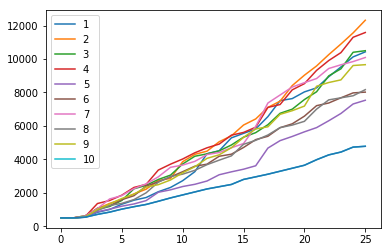

In [21]:
x = range(len(t["frames"]))

for l in range(1,11):
    y = []
    for i in x:
        y.append(t["frames"][i]["participantFrames"][str(l)]["totalGold"])
    plt.plot(x,y)

plt.plot(x,y)
plt.legend(range(1,11))

plt.show()

In [22]:
match_url ="https://jp1.api.riotgames.com/lol/match/v4/matches/"
match_url = match_url+str(r["matches"][0]["gameId"])+linkkey
match_detail = requests.get(match_url).json()

In [25]:
match_detail.keys()

dict_keys(['gameId', 'platformId', 'gameCreation', 'gameDuration', 'queueId', 'mapId', 'seasonId', 'gameVersion', 'gameMode', 'gameType', 'teams', 'participants', 'participantIdentities'])

In [43]:
match_detail["participantIdentities"][0]

{'participantId': 1,
 'player': {'platformId': 'JP1',
  'accountId': 'EGwMmOOt7AyFB0DBHZgFaoPBhsixBg-dQvSL8gRgRackXLw',
  'summonerName': 'nanahra',
  'summonerId': 'IdlIzmR5Bn2G2WKqHlMyC9fMEr7zMLF-Q39lvhpUH9nhiQ',
  'currentPlatformId': 'JP1',
  'currentAccountId': 'EGwMmOOt7AyFB0DBHZgFaoPBhsixBg-dQvSL8gRgRackXLw',
  'matchHistoryUri': '/v1/stats/player_history/JP1/201281483',
  'profileIcon': 3506}}